# Overlaying Sreekumar metabolism signatures

# Set up workspace:

In [1]:
#load packages I need
import os
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

Print software versions:

In [3]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [66]:
# read in data
data = sc.read_h5ad('NRclean_clustered2.h5ad')
data_DC = sc.read_h5ad('NRclean_clustered2_DC.h5ad')

In [67]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

In [7]:
data_DC

AnnData object with n_obs × n_vars = 30241 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotatio

### Overlay the signatures: 

In [68]:
#make an object with each signature - see excel file Sreekumar Metabolism Gene sets on i drive
Lipid_sig = ['HSD3B7','NSDHL','CAV1','ANXA2','PLA2G4A','ACSL1','ACSL3','PPARG','SMARCD3','SLC27A1','ME1','RXRA','TBL1X','HMGCS1','HMGCR']
FA_sig = ['ACSM3','GPD1','ACAT2','FH','IDI1','NSDHL','NTHL1','ALAD','SOAT1']
Organelle_sig = ['EEA1','Rab10','Rab11A','wdy4','RAB5B','RAB5A','RAB7A','RAB7B','RAB9A','RABEPK','CTSZ','LIPA','FLCN','ACP2','ARL8B']
Transport_sig = ['AP1S3','SLC15A4','MFSD12','PI4KA','FLVCR2','TIAM1','MFSD12','ATP6V0D1','ATP6V1D','ATP6V1F','ATP6V1B2','ATP6V1E1','ATP6V1G1','ATP6V0B']
mTOR_sig = ['WDR59','RRAGC','RRAGD','EEF2K','LAMTOR3','RHEB','CHML']
Autophagy_sig = ['BIRC2','MAPK8','DRAM1','ITPR1','MTMR9','TXN','TRAF2','XBP1','ATG','RUBCN','ABL2','LANCL2','WIPI1 ']
Signalling_sig = ['STK24','ANO6','BASP1','GGTA1']

In [69]:
#score genes on full atlas
sc.tl.score_genes(data, Lipid_sig, score_name='Lipid_score')
sc.tl.score_genes(data, FA_sig, score_name='FA_score')
sc.tl.score_genes(data, Organelle_sig, score_name='Organelle_score')
sc.tl.score_genes(data, Transport_sig, score_name='Transport_score')
sc.tl.score_genes(data, mTOR_sig, score_name='mTOR_score')
sc.tl.score_genes(data, Autophagy_sig, score_name='Autophagy_score')
sc.tl.score_genes(data, Signalling_sig, score_name='Signalling_score')

In [10]:
#score genes on DC atlas
sc.tl.score_genes(data_DC, Lipid_sig, score_name='Lipid_score')
sc.tl.score_genes(data_DC, FA_sig, score_name='FA_score')
sc.tl.score_genes(data_DC, Organelle_sig, score_name='Organelle_score')
sc.tl.score_genes(data_DC, Transport_sig, score_name='Transport_score')
sc.tl.score_genes(data_DC, mTOR_sig, score_name='mTOR_score')
sc.tl.score_genes(data_DC, Autophagy_sig, score_name='Autophagy_score')
sc.tl.score_genes(data_DC, Signalling_sig, score_name='Signalling_score')

In [14]:
colour_vars = ["Lipid_score","FA_score","Organelle_score","Transport_score","mTOR_score","Autophagy_score","Signalling_score","NR_annotations_simple"]

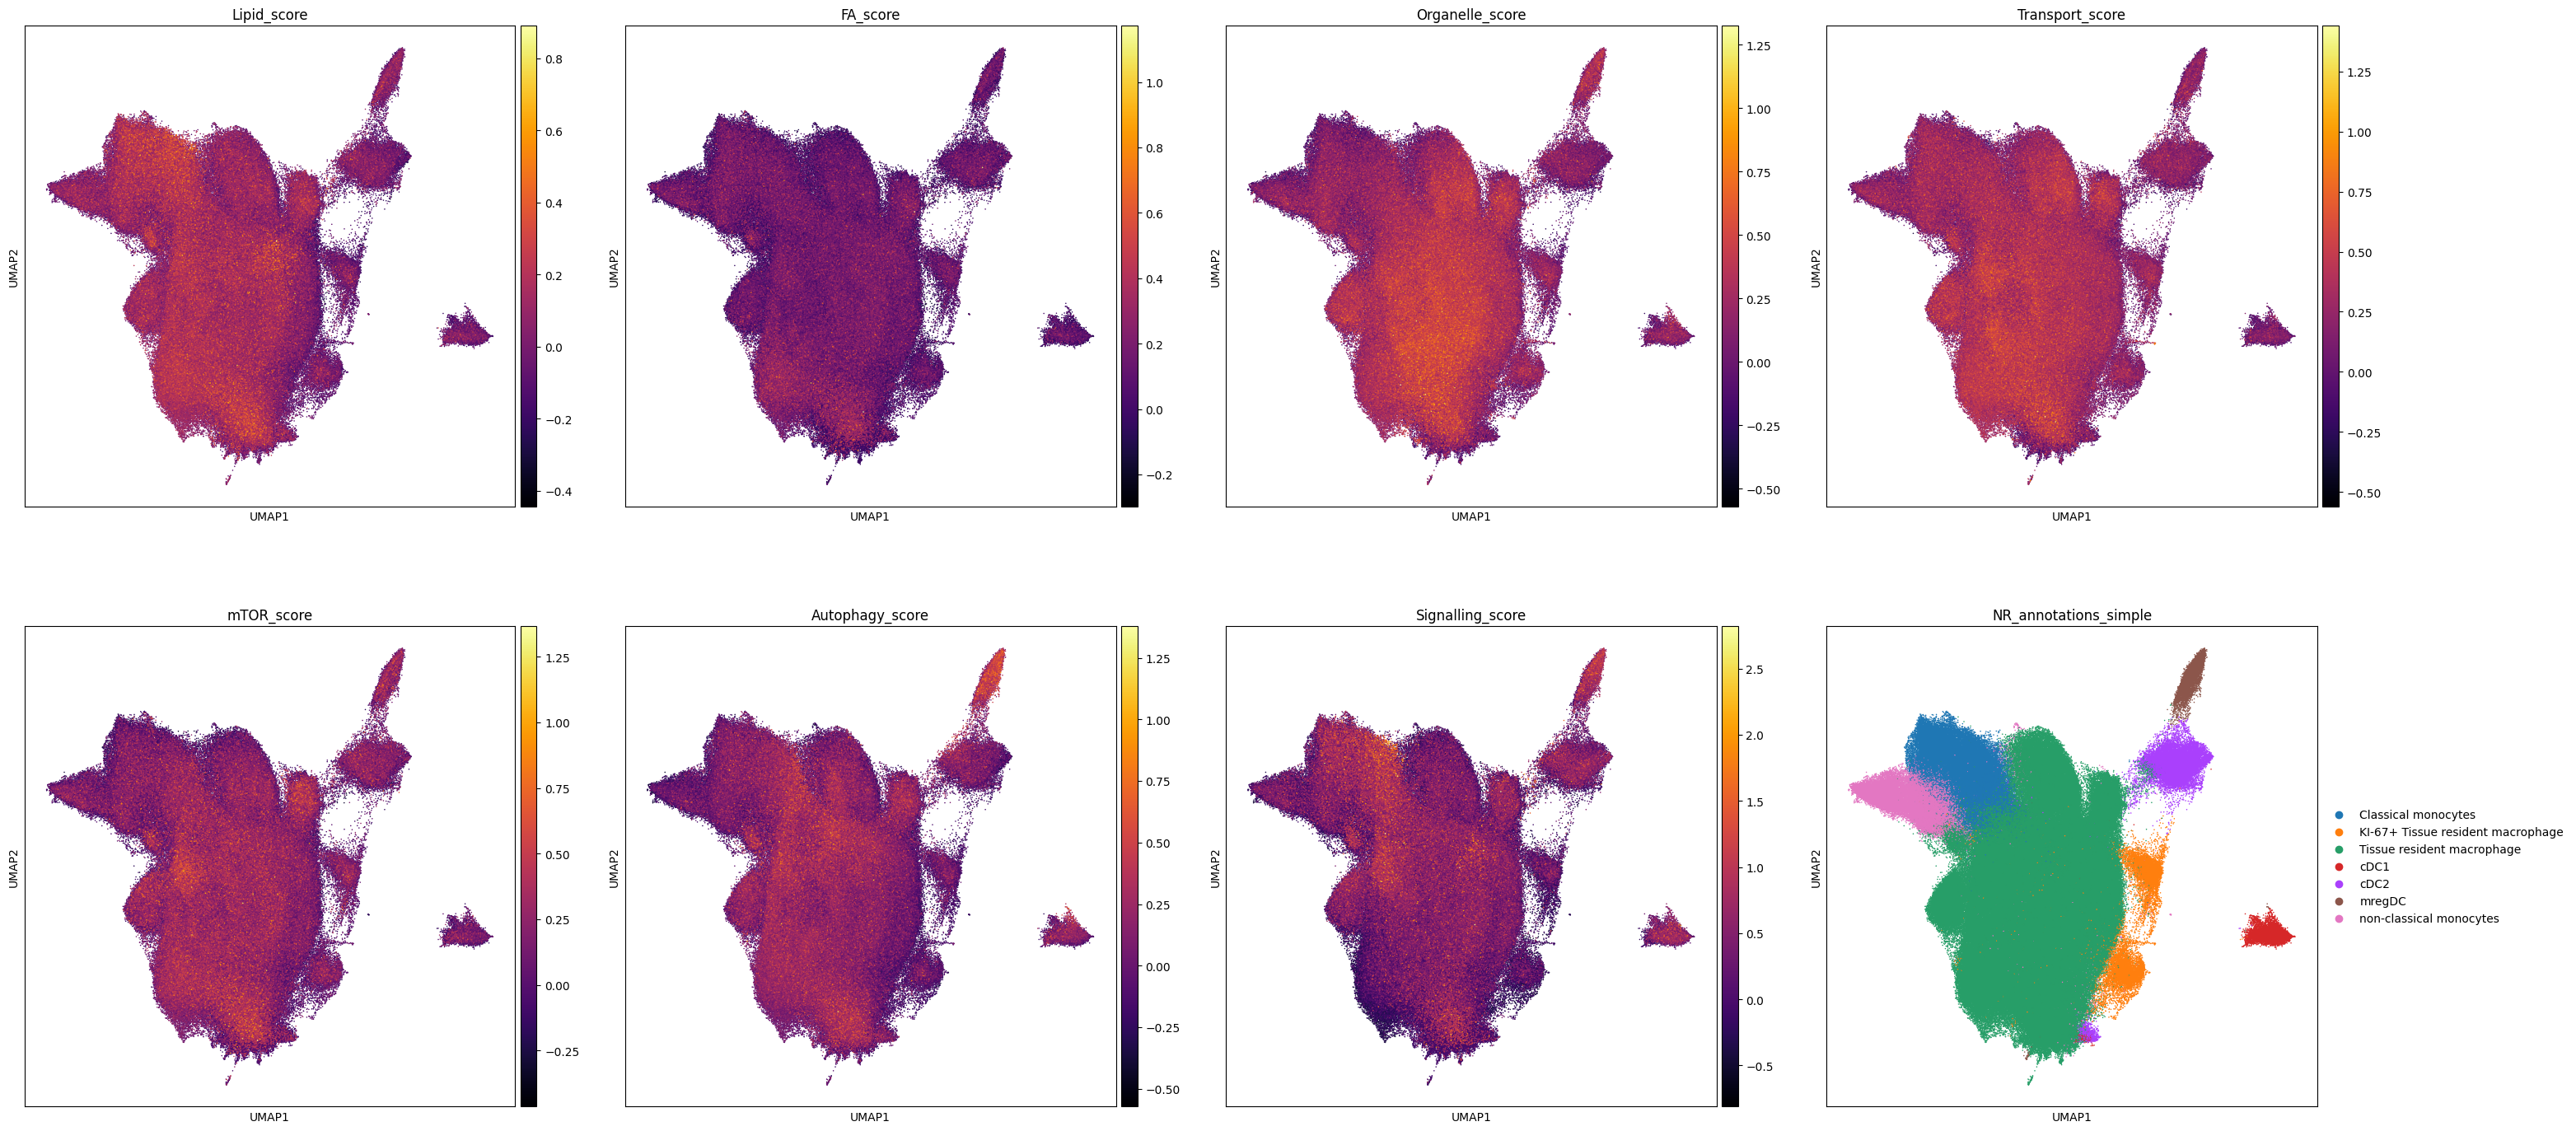

In [70]:
#plotting 
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color=colour_vars, ncols=4, size=5, color_map="inferno")

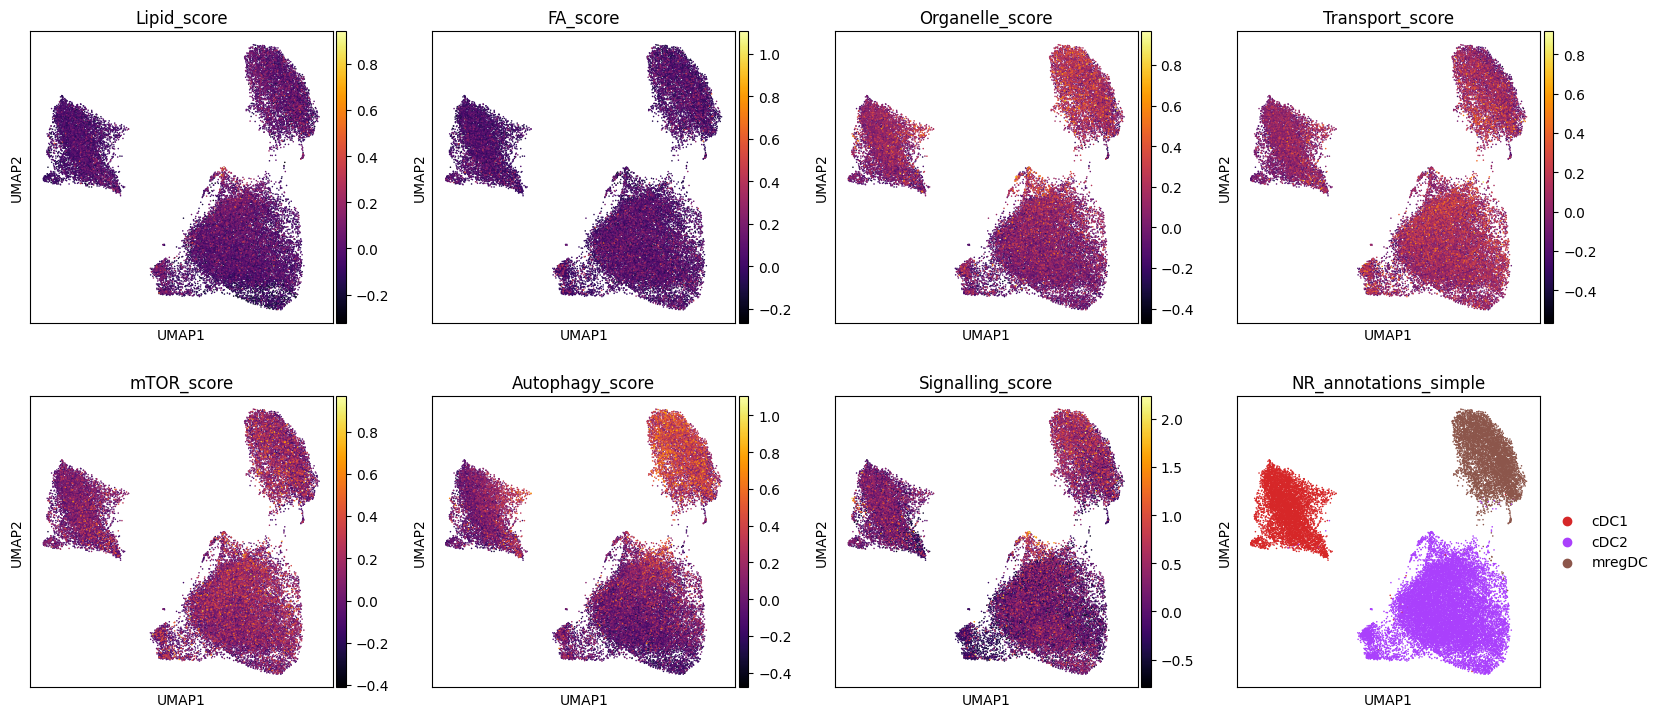

In [27]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_DC, color=colour_vars, ncols=4, size=5, color_map="inferno")

# Repeat only on primary tumours:

In [30]:
#make sub-objects for primary
data_primary = data[data.obs["sample_type_major2"] == "primary tumour"]
data_DC_primary = data_DC[data_DC.obs["sample_type_major2"] == "primary tumour"]

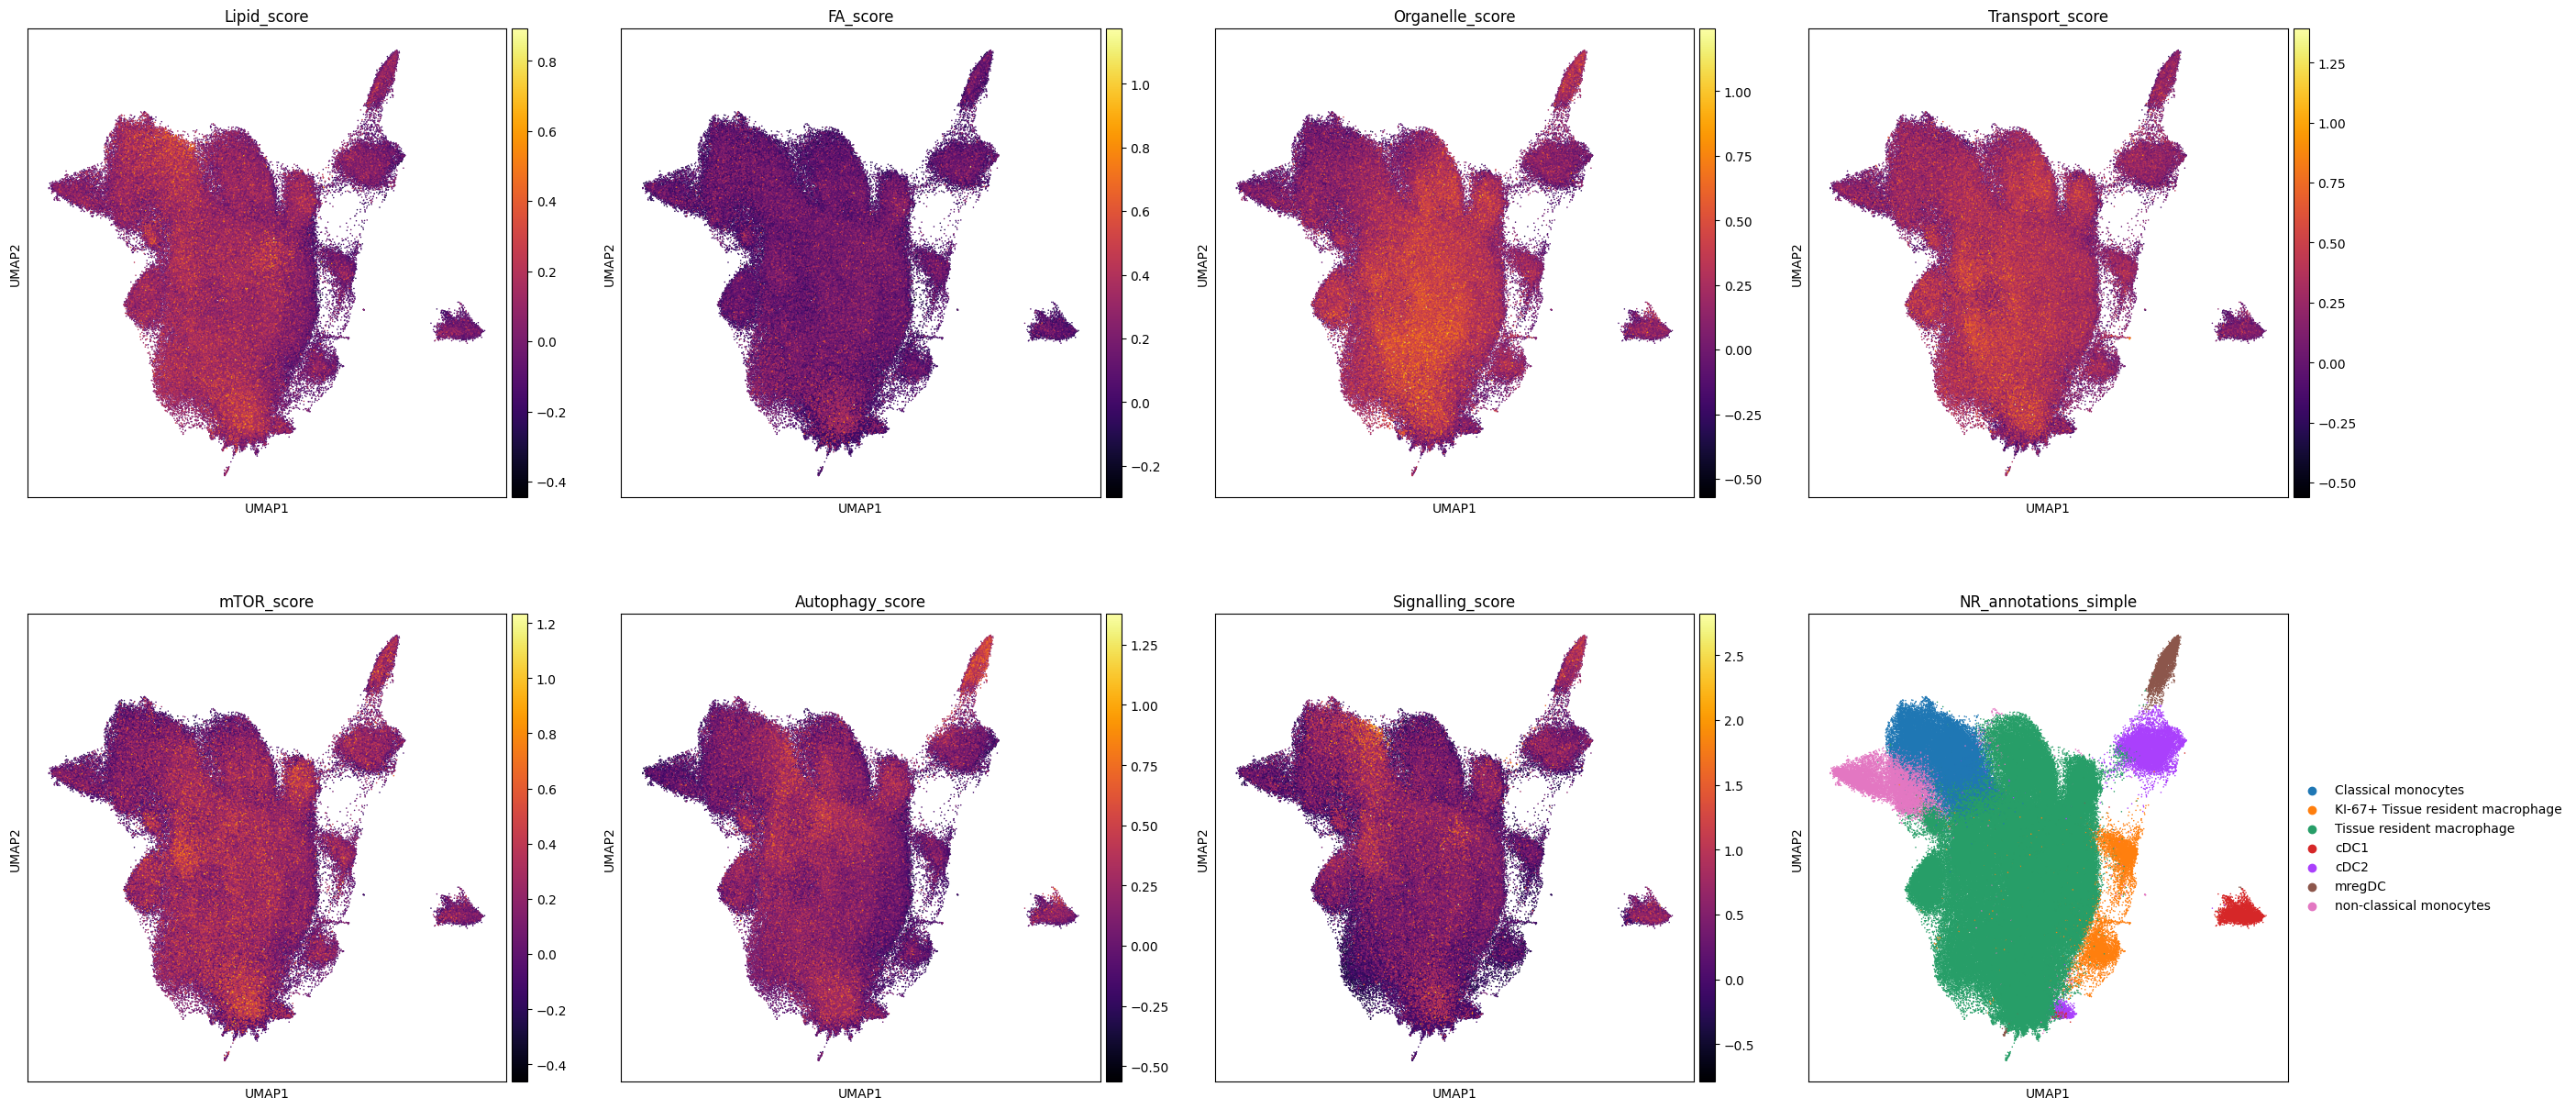

In [50]:
#plotting 
with plt.rc_context({"figure.figsize": (7, 7)}):
    sc.pl.umap(data_primary, color=colour_vars, ncols=4, size=5, color_map="inferno")

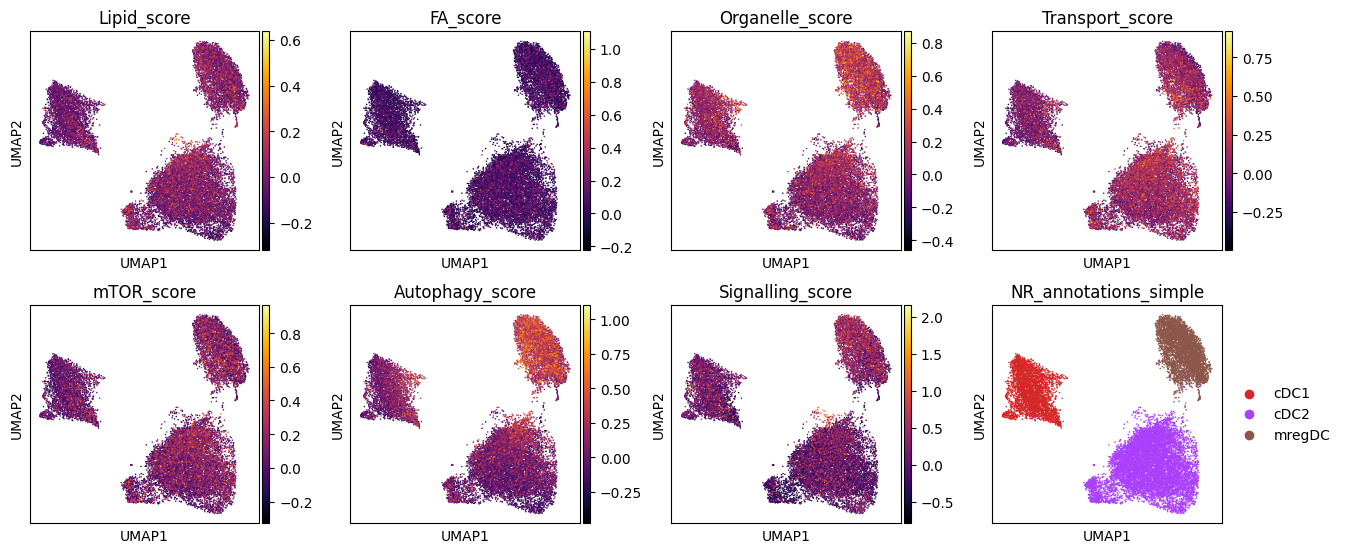

In [49]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC_primary, color=colour_vars, ncols=4, size=5, color_map="inferno")

/scratch/temp/13451516/ipykernel_71203/2696830863.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Lipid_scores': Lipid_scores.groupby([cancer_types, cell_types]).mean(),


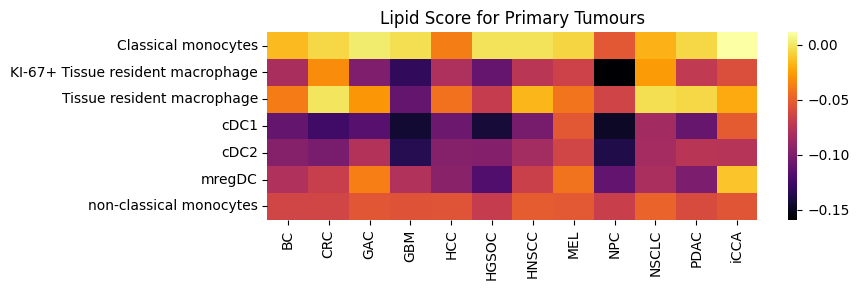

In [38]:
# Calculate the mean scores for each cancer type
cell_types = data_primary.obs['NR_annotations_simple']
cancer_types = data_primary.obs['cancer_broadest']
Lipid_scores = data_primary.obs['Lipid_score']

# Create a DataFrame with the mean scores per cell type and cancer type
scores_df = pd.DataFrame({
    'Lipid_scores': Lipid_scores.groupby([cancer_types, cell_types]).mean(),
})

# Pivot the DataFrame to have cancer types as columns and cell types as rows
scores_df = scores_df.unstack(level=1).T  # Unstack cancer types to columns, leaving cell types as rows

# Remove the prefix from the row labels
scores_df.index = scores_df.index.droplevel(0)  # Drop the first level of the index (Uptake_score)

# Plot the heatmap
plt.figure(figsize=(9, 3), dpi=100)
sns.heatmap(scores_df, cmap='inferno', annot=False, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Lipid Score for Primary Tumours', fontsize=12)
plt.tight_layout()
plt.show()

/scratch/temp/13451516/ipykernel_71203/1451277923.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'FA_scores': FA_scores.groupby([cancer_types, cell_types]).mean(),


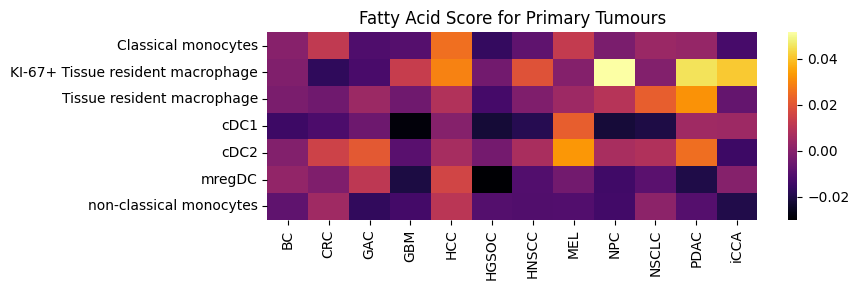

In [40]:
# Calculate the mean scores for each cancer type
cell_types = data_primary.obs['NR_annotations_simple']
cancer_types = data_primary.obs['cancer_broadest']
FA_scores = data_primary.obs['FA_score']

# Create a DataFrame with the mean scores per cell type and cancer type
scores_df = pd.DataFrame({
    'FA_scores': FA_scores.groupby([cancer_types, cell_types]).mean(),
})

# Pivot the DataFrame to have cancer types as columns and cell types as rows
scores_df = scores_df.unstack(level=1).T  # Unstack cancer types to columns, leaving cell types as rows

# Remove the prefix from the row labels
scores_df.index = scores_df.index.droplevel(0)  # Drop the first level of the index (Uptake_score)

# Plot the heatmap
plt.figure(figsize=(9, 3), dpi=100)
sns.heatmap(scores_df, cmap='inferno', annot=False, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Fatty Acid Score for Primary Tumours', fontsize=12)
plt.tight_layout()
plt.show()

/scratch/temp/13451516/ipykernel_71203/4146279134.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Organelle_scores': Organelle_scores.groupby([cancer_types, cell_types]).mean(),


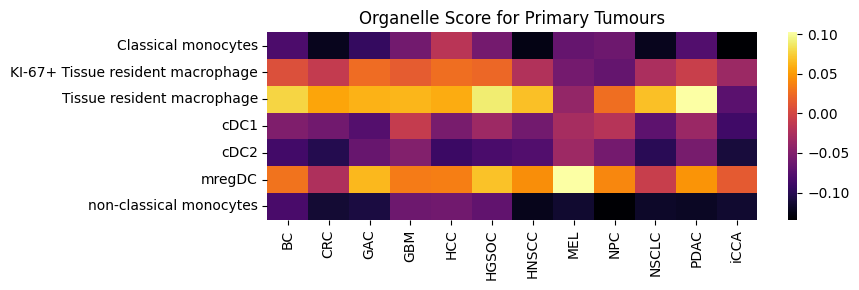

In [44]:
# Calculate the mean scores for each cancer type
cell_types = data_primary.obs['NR_annotations_simple']
cancer_types = data_primary.obs['cancer_broadest']
Organelle_scores = data_primary.obs['Organelle_score']

# Create a DataFrame with the mean scores per cell type and cancer type
scores_df = pd.DataFrame({
    'Organelle_scores': Organelle_scores.groupby([cancer_types, cell_types]).mean(),
})

# Pivot the DataFrame to have cancer types as columns and cell types as rows
scores_df = scores_df.unstack(level=1).T  # Unstack cancer types to columns, leaving cell types as rows

# Remove the prefix from the row labels
scores_df.index = scores_df.index.droplevel(0)  # Drop the first level of the index (Uptake_score)

# Plot the heatmap
plt.figure(figsize=(9, 3), dpi=100)
sns.heatmap(scores_df, cmap='inferno', annot=False, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Organelle Score for Primary Tumours', fontsize=12)
plt.tight_layout()
plt.show()

/scratch/temp/13451516/ipykernel_71203/755935398.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Transport_scores': Transport_scores.groupby([cancer_types, cell_types]).mean(),


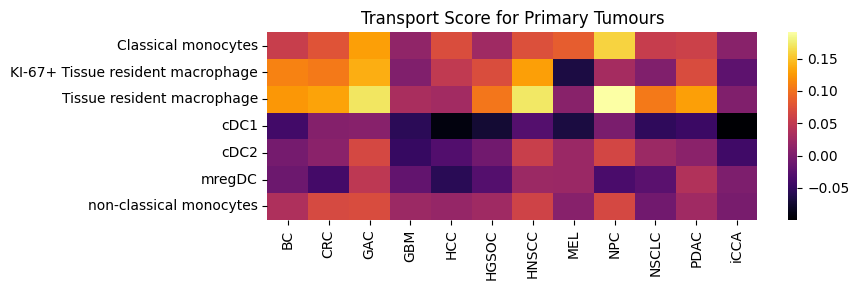

In [45]:
# Calculate the mean scores for each cancer type
cell_types = data_primary.obs['NR_annotations_simple']
cancer_types = data_primary.obs['cancer_broadest']
Transport_scores = data_primary.obs['Transport_score']

# Create a DataFrame with the mean scores per cell type and cancer type
scores_df = pd.DataFrame({
    'Transport_scores': Transport_scores.groupby([cancer_types, cell_types]).mean(),
})

# Pivot the DataFrame to have cancer types as columns and cell types as rows
scores_df = scores_df.unstack(level=1).T  # Unstack cancer types to columns, leaving cell types as rows

# Remove the prefix from the row labels
scores_df.index = scores_df.index.droplevel(0)  # Drop the first level of the index (Uptake_score)

# Plot the heatmap
plt.figure(figsize=(9, 3), dpi=100)
sns.heatmap(scores_df, cmap='inferno', annot=False, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Transport Score for Primary Tumours', fontsize=12)
plt.tight_layout()
plt.show()

/scratch/temp/13451516/ipykernel_71203/2458936003.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'mTOR_scores': mTOR_scores.groupby([cancer_types, cell_types]).mean(),


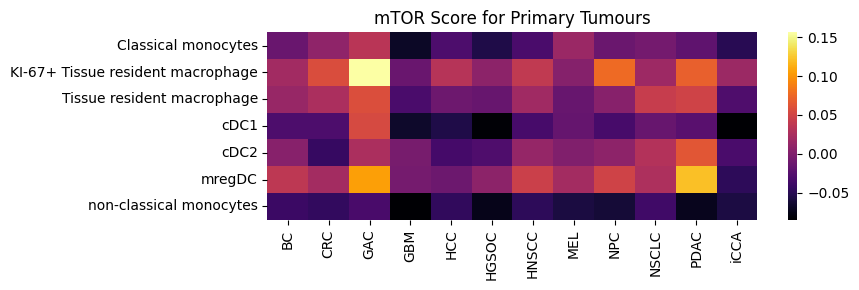

In [46]:
# Calculate the mean scores for each cancer type
cell_types = data_primary.obs['NR_annotations_simple']
cancer_types = data_primary.obs['cancer_broadest']
mTOR_scores = data_primary.obs['mTOR_score']

# Create a DataFrame with the mean scores per cell type and cancer type
scores_df = pd.DataFrame({
    'mTOR_scores': mTOR_scores.groupby([cancer_types, cell_types]).mean(),
})

# Pivot the DataFrame to have cancer types as columns and cell types as rows
scores_df = scores_df.unstack(level=1).T  # Unstack cancer types to columns, leaving cell types as rows

# Remove the prefix from the row labels
scores_df.index = scores_df.index.droplevel(0)  # Drop the first level of the index (Uptake_score)

# Plot the heatmap
plt.figure(figsize=(9, 3), dpi=100)
sns.heatmap(scores_df, cmap='inferno', annot=False, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.title('mTOR Score for Primary Tumours', fontsize=12)
plt.tight_layout()
plt.show()

/scratch/temp/13451516/ipykernel_71203/79880459.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Autophagy_scores': Autophagy_scores.groupby([cancer_types, cell_types]).mean(),


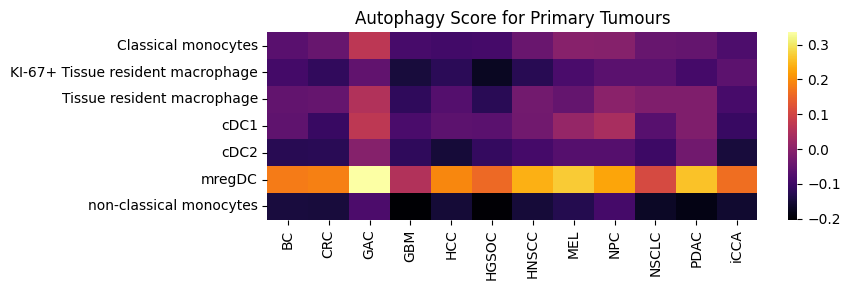

In [47]:
# Calculate the mean scores for each cancer type
cell_types = data_primary.obs['NR_annotations_simple']
cancer_types = data_primary.obs['cancer_broadest']
Autophagy_scores = data_primary.obs['Autophagy_score']

# Create a DataFrame with the mean scores per cell type and cancer type
scores_df = pd.DataFrame({
    'Autophagy_scores': Autophagy_scores.groupby([cancer_types, cell_types]).mean(),
})

# Pivot the DataFrame to have cancer types as columns and cell types as rows
scores_df = scores_df.unstack(level=1).T  # Unstack cancer types to columns, leaving cell types as rows

# Remove the prefix from the row labels
scores_df.index = scores_df.index.droplevel(0)  # Drop the first level of the index (Uptake_score)

# Plot the heatmap
plt.figure(figsize=(9, 3), dpi=100)
sns.heatmap(scores_df, cmap='inferno', annot=False, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Autophagy Score for Primary Tumours', fontsize=12)
plt.tight_layout()
plt.show()

/scratch/temp/13451516/ipykernel_71203/334727959.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Signalling_scores': Signalling_scores.groupby([cancer_types, cell_types]).mean(),


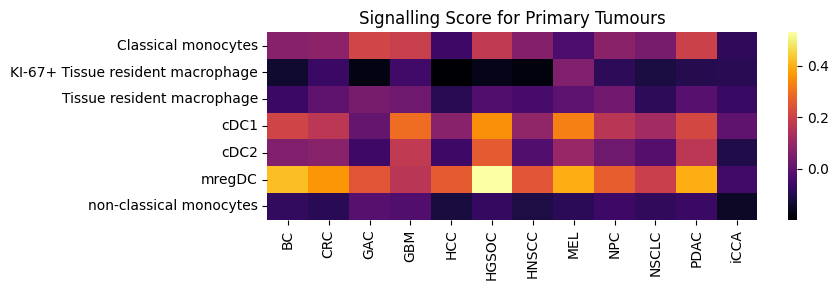

In [48]:
# Calculate the mean scores for each cancer type
cell_types = data_primary.obs['NR_annotations_simple']
cancer_types = data_primary.obs['cancer_broadest']
Signalling_scores = data_primary.obs['Signalling_score']

# Create a DataFrame with the mean scores per cell type and cancer type
scores_df = pd.DataFrame({
    'Signalling_scores': Signalling_scores.groupby([cancer_types, cell_types]).mean(),
})

# Pivot the DataFrame to have cancer types as columns and cell types as rows
scores_df = scores_df.unstack(level=1).T  # Unstack cancer types to columns, leaving cell types as rows

# Remove the prefix from the row labels
scores_df.index = scores_df.index.droplevel(0)  # Drop the first level of the index (Uptake_score)

# Plot the heatmap
plt.figure(figsize=(9, 3), dpi=100)
sns.heatmap(scores_df, cmap='inferno', annot=False, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Signalling Score for Primary Tumours', fontsize=12)
plt.tight_layout()
plt.show()

# Export to excel for plotting on a per sample basis

In [73]:
#make seperate object for each DC type
data_DC1 = data[data.obs["NR_annotations_simple"] == "cDC1"]
data_DC2 = data[data.obs["NR_annotations_simple"] == "cDC2"]
data_mregDC = data[data.obs["NR_annotations_simple"] == "mregDC"]
data_class_mono = data[data.obs["NR_annotations_simple"] == "Classical monocytes"]
data_KI67_mac = data[data.obs["NR_annotations_simple"] == "KI-67+ Tissue resident macrophage"]
data_macs = data[data.obs["NR_annotations_simple"] == "Tissue resident macrophage"]
data_non_class_mono = data[data.obs["NR_annotations_simple"] == "non-classical monocytes"]

In [74]:
# Define the signature score columns
signature_scores = ["Lipid_score", "FA_score", "Organelle_score", 
                    "Transport_score", "mTOR_score", "Autophagy_score", "Signalling_score"]

# Define subsets to loop over 
cell_subsets = {
    "DC1": data_DC1,
    "DC2": data_DC2,
    "mregDC": data_mregDC,
    "Classical mono": data_class_mono,
    "KI-67+ mac": data_KI67_mac,
    "Tissue res mac": data_macs,
    "non-class mono": data_non_class_mono
}

# Dictionary to store results
score_summaries = {}

#loop over each subset
for cell_name, data_l in cell_subsets.items():
    # Compute mean signature scores
    score_summary = (
        data_l.obs.groupby("integration_id")[signature_scores].mean()
        .reset_index()
    )
    
    # Merge with metadata
    metadata_cols = ["integration_id", "cancer_broadest", "NR_annotations_simple", "sample_type_major2", "site"]
    metadata_df = data_l.obs[metadata_cols].drop_duplicates()
    
    score_summaries[cell_name] = score_summary.merge(metadata_df, on="integration_id", how="left")

# Save to Excel
output_file = "Sreekumar_signature_scores.xlsx"
with pd.ExcelWriter(output_file) as writer:
    for cell_name, df in score_summaries.items():
        df.to_excel(writer, sheet_name=cell_name, index=False)

/scratch/temp/13451516/ipykernel_71203/3276745015.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_l.obs.groupby("integration_id")[signature_scores].mean()
/scratch/temp/13451516/ipykernel_71203/3276745015.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_l.obs.groupby("integration_id")[signature_scores].mean()
/scratch/temp/13451516/ipykernel_71203/3276745015.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this wa

# above will then be plotted with prism